In [2]:
!pip install wfdb gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [37]:
import wfdb
import gdown
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

In [4]:
url = "https://drive.google.com/uc?id=1ujaH4D15dGtrV5ipHMoEktCvjsaGBWTl"
output = "/content/ECG_dataset.zip"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1ujaH4D15dGtrV5ipHMoEktCvjsaGBWTl
To: /content/ECG_dataset.zip
100%|██████████| 13.3M/13.3M [00:00<00:00, 55.6MB/s]


'/content/ECG_dataset.zip'

In [5]:
!unzip "/content/ECG_dataset.zip" -d "/content/"

Archive:  /content/ECG_dataset.zip
 extracting: /content/ecg-id-database-1.0.0/SHA256SUMS.txt  
 extracting: /content/ecg-id-database-1.0.0/RECORDS  
 extracting: /content/ecg-id-database-1.0.0/biometric.shtml  
 extracting: /content/ecg-id-database-1.0.0/ANNOTATORS  
 extracting: /content/ecg-id-database-1.0.0/README  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_3.hea  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_3.atr  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_2.dat  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_4.dat  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_2.hea  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_1.atr  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_4.atr  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_4.hea  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_2.atr  
 extracting: /content/ecg-id-database-1.0.0/Person_42/rec_3.dat  
 extracting: /cont

In [6]:
import os

for dir_name in sorted(os.listdir("/content/ecg-id-database-1.0.0")):
  print(os.path.join("/content/ecg-id-database-1.0.0", dir_name))

for file_name in sorted(os.listdir("/content/ecg-id-database-1.0.0/Person_01")):
  print(os.path.join("/content/ecg-id-database-1.0.0/Person_01", file_name))

/content/ecg-id-database-1.0.0/.old
/content/ecg-id-database-1.0.0/ANNOTATORS
/content/ecg-id-database-1.0.0/Person_01
/content/ecg-id-database-1.0.0/Person_02
/content/ecg-id-database-1.0.0/Person_03
/content/ecg-id-database-1.0.0/Person_04
/content/ecg-id-database-1.0.0/Person_05
/content/ecg-id-database-1.0.0/Person_06
/content/ecg-id-database-1.0.0/Person_07
/content/ecg-id-database-1.0.0/Person_08
/content/ecg-id-database-1.0.0/Person_09
/content/ecg-id-database-1.0.0/Person_10
/content/ecg-id-database-1.0.0/Person_11
/content/ecg-id-database-1.0.0/Person_12
/content/ecg-id-database-1.0.0/Person_13
/content/ecg-id-database-1.0.0/Person_14
/content/ecg-id-database-1.0.0/Person_15
/content/ecg-id-database-1.0.0/Person_16
/content/ecg-id-database-1.0.0/Person_17
/content/ecg-id-database-1.0.0/Person_18
/content/ecg-id-database-1.0.0/Person_19
/content/ecg-id-database-1.0.0/Person_20
/content/ecg-id-database-1.0.0/Person_21
/content/ecg-id-database-1.0.0/Person_22
/content/ecg-id-data

In [16]:
#attività cardiaca in milliVolt
ecg = wfdb.rdrecord("/content/ecg-id-database-1.0.0/Person_01/rec_1", channels=[0])
print(f"p_signal: {ecg.p_signal}\n")
print(f"Measure unit: {ecg.units}\n")
print(f"signal length a.k.a. no. of samples: {ecg.sig_len}\n")
print(f"Sampling frequency: {ecg.fs}")

p_signal: [[-0.085]
 [-0.08 ]
 [-0.07 ]
 ...
 [-0.065]
 [-0.08 ]
 [-0.08 ]]

Measure unit: ['mV']

signal length a.k.a. no. of samples: 10000

Sampling frequency: 500


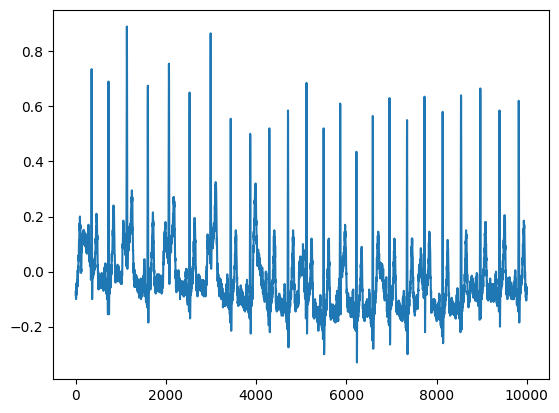

In [20]:
plt.plot(ecg.p_signal)

In [27]:
annotation = wfdb.rdann("/content/ecg-id-database-1.0.0/Person_01/rec_1", "atr")
symbols = annotation.symbol
print(symbols)

['N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't', 'N', 't']


In [29]:
locations = annotation.sample
print(locations)

matrix = np.column_stack((symbols, locations))
print(matrix)

[ 352  469  727  839 1135 1246 1599 1715 2067 2183 2525 2638 2992 3109
 3436 3556 3870 3980 4293 4407]
[['N' '352']
 ['t' '469']
 ['N' '727']
 ['t' '839']
 ['N' '1135']
 ['t' '1246']
 ['N' '1599']
 ['t' '1715']
 ['N' '2067']
 ['t' '2183']
 ['N' '2525']
 ['t' '2638']
 ['N' '2992']
 ['t' '3109']
 ['N' '3436']
 ['t' '3556']
 ['N' '3870']
 ['t' '3980']
 ['N' '4293']
 ['t' '4407']]


In [42]:
person_path = "/content/ecg-id-database-1.0.0/Person_01"
record_names = [f[:-4] for f in os.listdir(person_path) if f.endswith(".hea")]
flattened_records = []

for rec in record_names:
  try:
    record = wfdb.rdrecord(os.path.join(person_path, rec), channels=[0])

    flat_signal = record.p_signal.flatten()

    row = pd.DataFrame([flat_signal])
    row['record_name'] = rec

    flattened_records.append(row)

  except Exception as e:
    print(f"Failed to create Dataframe row for {rec}: {str(e)}")

final_df = pd.concat(flattened_records, ignore_index=True)
display(final_df)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,record_name
0,0.585,0.600,0.525,0.515,0.420,0.410,0.375,0.375,0.440,0.465,...,-0.045,-0.115,-0.070,-0.055,-0.025,0.005,0.070,0.085,0.020,rec_7
1,0.075,0.050,0.075,0.130,0.225,0.290,0.330,0.305,0.250,0.160,...,-0.105,-0.210,-0.275,-0.265,-0.160,-0.115,-0.015,0.025,0.015,rec_14
2,-0.065,-0.095,-0.115,-0.105,-0.090,-0.025,-0.025,-0.015,0.000,-0.020,...,0.605,0.490,0.340,0.310,0.365,0.425,0.555,0.670,0.685,rec_4
3,-0.100,-0.085,-0.010,0.000,-0.025,-0.035,-0.045,-0.075,-0.125,-0.125,...,-0.105,-0.160,-0.200,-0.160,-0.125,-0.085,-0.055,-0.020,-0.055,rec_2
4,0.265,0.250,0.230,0.240,0.245,0.285,0.315,0.355,0.335,0.300,...,-0.025,-0.055,-0.045,-0.050,-0.100,-0.165,-0.180,-0.100,-0.080,rec_5
5,-0.085,-0.080,-0.070,-0.075,-0.095,-0.090,-0.100,-0.100,-0.100,-0.085,...,-0.095,-0.090,-0.070,-0.070,-0.055,-0.060,-0.065,-0.080,-0.080,rec_1
6,0.105,0.135,0.115,0.065,-0.125,-0.190,-0.140,-0.120,-0.070,0.025,...,0.095,0.050,0.000,-0.095,-0.210,-0.220,-0.175,-0.165,-0.050,rec_10
7,0.045,0.105,0.080,0.155,0.150,0.210,0.235,0.200,0.135,0.145,...,-0.190,-0.175,-0.215,-0.090,-0.070,0.030,0.040,0.020,-0.040,rec_12
8,0.370,0.190,0.065,0.045,0.070,0.045,0.255,0.330,0.295,0.380,...,0.065,0.225,0.200,0.060,0.050,0.000,0.000,-0.125,0.025,rec_20
9,-0.065,-0.050,0.000,0.070,0.135,0.160,0.135,0.095,0.025,-0.055,...,-0.060,-0.005,0.060,0.075,0.035,-0.005,-0.045,-0.100,-0.090,rec_17


Text(469, [0.705], 't')

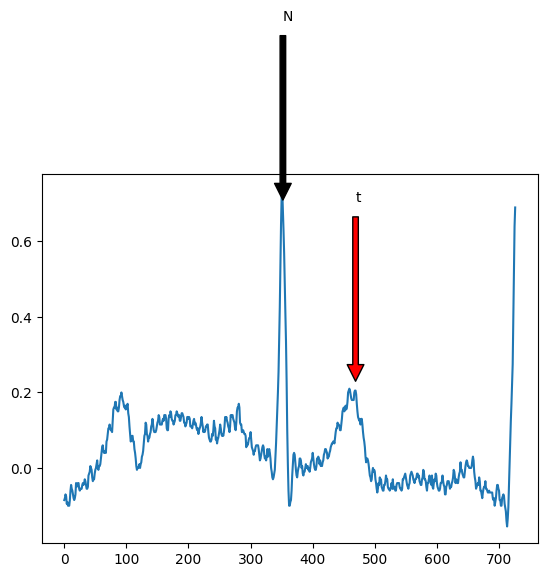

In [48]:
notation_N = "N"
notation_t = "t"

location_N = locations[0]
location_t = locations[1]

first_slice = ecg.p_signal[0:locations[2]]

value_N = first_slice[location_N]
value_t = first_slice[location_t]

plt.plot(first_slice)

plt.annotate(str(notation_N), xy=(location_N, value_N), xytext=(location_N, value_N+0.5), arrowprops=dict(facecolor="black", shrink=0.05))
plt.annotate(str(notation_t), xy=(location_t, value_t), xytext=(location_t, value_t+0.5), arrowprops=dict(facecolor="red", shrink=0.05))